<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/SQL_Ships_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
sqlite3.sqlite_version  # '3.38.0'

'3.31.1'

In [3]:
con = sqlite3.connect('bd_ships')
cur = con.cursor()

In [4]:
def select (sql):
  return pd.read_sql(sql,con)

# Создаем таблицы:

In [5]:
cur.executescript('''

drop table if exists outcomes;
drop table if exists ships;
drop table if exists classes;
drop table if exists battles;

CREATE TABLE Battles (
	name varchar (20) NOT NULL ,
	date datetime NOT NULL 
);


CREATE TABLE Classes (
	class varchar (50) NOT NULL ,
	type varchar (2) NOT NULL ,
	country varchar (20) NOT NULL ,
	numGuns int NULL ,
	bore real NULL ,
	displacement int NULL 
); 


CREATE TABLE Ships (
	name varchar (50) NOT NULL ,
	class varchar (50) NOT NULL ,
	launched int NULL 
); 


CREATE TABLE Outcomes (
	ship varchar (50) NOT NULL ,
	battle varchar (20) NOT NULL ,
	result varchar (10) NOT NULL 
);
''')
con.commit()

In [6]:
sql='''
select * from sqlite_master
'''
select (sql)

,type,name,tbl_name,rootpage,sql
0,table,Battles,Battles,2,CREATE TABLE Battles (\n\tname varchar (20) NO...
1,table,Classes,Classes,3,CREATE TABLE Classes (\n\tclass varchar (50) N...
2,table,Ships,Ships,4,CREATE TABLE Ships (\n\tname varchar (50) NOT ...
3,table,Outcomes,Outcomes,5,CREATE TABLE Outcomes (\n\tship varchar (50) N...


# Наполняем таблицы:

In [7]:
cur.executescript('''
/*----Classes----------------------------------------------------------- */
insert into Classes values('Bismarck','bb','Germany',8,15,42000);
insert into Classes values('Iowa','bb','USA',9,16,46000);
insert into Classes values('Kongo','bc','Japan',8,14,32000);
insert into Classes values('North Carolina','bb','USA',12,16,37000);
insert into Classes values('Renown','bc','Gt.Britain',6,15,32000);
insert into Classes values('Revenge','bb','Gt.Britain',8,15,29000);
insert into Classes values('Tennessee','bb','USA',12,14,32000);
insert into Classes values('Yamato','bb','Japan',9,18,65000);



                                                                                                                                                                                                                                                                 
/*----Battles---------------------------------------------------------- */
insert into Battles values('Guadalcanal','1942-11-15 00:00:00');
insert into Battles values('North Atlantic','1941-05-25 00:00:00');
insert into Battles values('North Cape','1943-12-26 00:00:00');
insert into Battles values('Surigao Strait','1944-10-25 00:00:00');
insert into Battles values ('#Cuba62a'   , '1962-10-20');
insert into Battles values ('#Cuba62b'   , '1962-10-25');



                                                                                                                                                                                                                                                                 
/*----Ships------------------------------------------------------------*/
insert into Ships values('California','Tennessee',1921);
insert into Ships values('Haruna','Kongo',1916);
insert into Ships values('Hiei','Kongo',1914);
insert into Ships values('Iowa','Iowa',1943);
insert into Ships values('Kirishima','Kongo',1915);
insert into Ships values('Kongo','Kongo',1913);
insert into Ships values('Missouri','Iowa',1944);
insert into Ships values('Musashi','Yamato',1942);
insert into Ships values('New Jersey','Iowa',1943);
insert into Ships values('North Carolina','North Carolina',1941);
insert into Ships values('Ramillies','Revenge',1917);
insert into Ships values('Renown','Renown',1916);
insert into Ships values('Repulse','Renown',1916);
insert into Ships values('Resolution','Renown',1916);
insert into Ships values('Revenge','Revenge',1916);
insert into Ships values('Royal Oak','Revenge',1916);
insert into Ships values('Royal Sovereign','Revenge',1916);
insert into Ships values('Tennessee','Tennessee',1920);
insert into Ships values('Washington','North Carolina',1941);
insert into Ships values('Wisconsin','Iowa',1944);
insert into Ships values('Yamato','Yamato',1941);
insert into Ships values('South Dakota','North Carolina',1941); 


                                                                                                                                                                                                                                                         
/*----Outcomes---------------------------------------------------------------*/
insert into Outcomes values('Bismarck','North Atlantic','sunk');
insert into Outcomes values('California','Surigao Strait','OK');
insert into Outcomes values('Duke of York','North Cape','OK');
insert into Outcomes values('Fuso','Surigao Strait','sunk');
insert into Outcomes values('Hood','North Atlantic','sunk');
insert into Outcomes values('King George V','North Atlantic','OK');
insert into Outcomes values('Kirishima','Guadalcanal','sunk');
insert into Outcomes values('Prince of Wales','North Atlantic','damaged');
insert into Outcomes values('Rodney','North Atlantic','OK');
insert into Outcomes values('Schamhorst','North Cape','sunk');
insert into Outcomes values('South Dakota','Guadalcanal','damaged');
insert into Outcomes values('Tennessee','Surigao Strait','OK');
insert into Outcomes values('Washington','Guadalcanal','OK');
insert into Outcomes values('West Virginia','Surigao Strait','OK');
insert into Outcomes values('Yamashiro','Surigao Strait','sunk');
insert into Outcomes values('California','Guadalcanal','damaged');
''')
con.commit()

# Описание БД:


Краткая информация о базе данных "Корабли"

Рассматривается БД кораблей, участвовавших во второй мировой войне. Имеются следующие отношения:     
Classes (class, type, country, numGuns, bore, displacement)     
Ships (name, class, launched)      
Battles (name, date)     
Outcomes (ship, battle, result)    


Корабли в «классах» построены по одному и тому же проекту, и классу присваивается либо имя первого корабля, построенного по данному проекту, либо названию класса дается имя проекта, которое не совпадает ни с одним из кораблей в БД. Корабль, давший название классу, называется головным.
Отношение Classes содержит имя класса, тип (bb для боевого (линейного) корабля или bc для боевого крейсера), страну, в которой построен корабль, число главных орудий, калибр орудий (диаметр ствола орудия в дюймах) и водоизмещение ( вес в тоннах). В отношении Ships записаны название корабля, имя его класса и год спуска на воду. В отношение Battles включены название и дата битвы, в которой участвовали корабли, а в отношении Outcomes – результат участия данного корабля в битве (потоплен-sunk, поврежден - damaged или невредим - OK).    


Замечания. 1) В отношение Outcomes могут входить корабли, отсутствующие в отношении Ships. 2) Потопленный корабль в последующих битвах участия не принимает.

# Задание:

**Найдите названия кораблей, имеющих наибольшее число орудий среди всех имеющихся кораблей такого же водоизмещения (учесть корабли из таблицы Outcomes).**

# Решение:

In [30]:
sql = '''
with v1 as -- Находим все корабли, которые есть в БД (таблицы outcomes и ships)
(
  Select ship, ship as class
  from outcomes o 
  join classes c 
    on o.ship=c.class
  UNION
  select name as ship, class
  from ships 
),

v2 as -- Добавим ко всем кораблям в БД число главных орудий и водоизмещение
(
select v1.ship,numGuns, displacement
from v1 
join classes c 
  on v1.class=c.class
),

max_guns as -- Для всех возможных вариаций водоизмещение (из тех кораблей, которые есть в БД) найдем максимальное число орудий
(
select displacement, max(numGuns) as max_gun
from v2
group by displacement
),

table_itog as -- Для каждого корабля из БД найдем маккимальное число орудий среди всех имеющихся кораблей такого же водоизмещения
(
select v2.ship,v2.numGuns, mg.max_gun
from v2
join max_guns mg
  on v2.displacement=mg.displacement
)

select ship, numGuns from table_itog
where numGuns=max_gun

'''
select (sql)

,ship,numGuns
0,Bismarck,8
1,Iowa,9
2,Missouri,9
3,New Jersey,9
4,Wisconsin,9
5,North Carolina,12
6,South Dakota,12
7,Washington,12
8,Ramillies,8
9,Revenge,8


In [31]:
t = select(sql)

In [35]:
t

,ship,numGuns
0,Bismarck,8
1,Iowa,9
2,Missouri,9
3,New Jersey,9
4,Wisconsin,9
5,North Carolina,12
6,South Dakota,12
7,Washington,12
8,Ramillies,8
9,Revenge,8


Text(0, 0.5, 'Количество орудий')

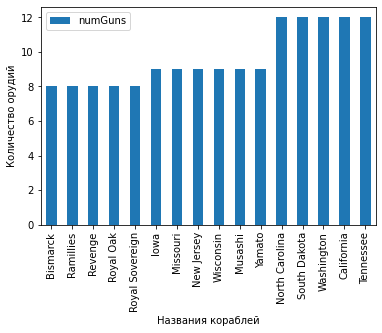

In [41]:
t.sort_values('numGuns').plot(x='ship', y='numGuns', kind='bar')
plt.xlabel('Названия кораблей')
plt.ylabel('Количество орудий')